In [2]:
# import quandl
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import warnings 
# df = quandl.get("WIKI/AMZN")
df = pd.read_csv('intraday_5min_IBM.csv')
df

,timestamp,open,high,low,close,volume
0,6/4/2021 19:20,147.6800,147.6800,147.6800,147.6800,100
1,6/4/2021 18:45,147.2700,147.2700,147.2500,147.2500,637
2,6/4/2021 18:40,147.3000,147.3000,147.3000,147.3000,100
3,6/4/2021 18:20,147.3600,147.3600,147.3600,147.3600,200
4,6/4/2021 18:15,147.4000,147.4000,147.4000,147.4000,100
5,6/4/2021 17:10,147.4900,147.5000,147.4900,147.5000,472
6,6/4/2021 16:20,147.4200,147.4200,147.4200,147.4200,1175
7,6/4/2021 16:15,147.5000,147.5000,147.5000,147.5000,114
8,6/4/2021 16:05,147.4200,147.7700,147.4200,147.7700,32741
9,6/4/2021 16:00,147.4350,147.4600,147.3300,147.4200,204257


In [3]:
# draw a time series plot
import matplotlib.pyplot as plt
from matplotlib import *
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['open'])
plt.xlabel('Time Points')
plt.ylabel('opening value')
plt.title('Time Series Plot')

Text(0.5, 1.0, 'Time Series Plot')

In [4]:
df=df.iloc[::-1]
#df.index = df['timestamp']
#del df['timestamp']
#df.info()


In [5]:
df = df[['close']]


df.head()



,close
99,145.665
98,145.500
97,145.580
96,145.550
95,145.550


In [6]:
df = df[['close']]

forecast_out = int(30)

df['Prediction'] = df[['close']].shift(-forecast_out)
df


,close,Prediction
99,145.6650,146.7500
98,145.5000,146.8478
97,145.5800,146.9300
96,145.5500,147.0000
95,145.5500,146.8119
94,145.5500,146.6800
93,144.5701,146.6550
92,145.5500,146.7000
91,144.6610,146.6950
90,145.6500,146.6800


In [7]:
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



In [9]:
clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

print(clf.score(X_test,y_test))

confidence:  0.7493346937781976
[147.4219356  147.44745002 147.47981907 147.49021525 147.51028405
 147.47795309 147.45887439 147.44173784 147.4740688  147.45510435
 147.47410689 147.47601095 147.47791501 147.47410689 147.47601095
 147.48553125 147.45125815 147.46649064 147.44745002 147.47981907
 147.47410689 147.60739119 147.50457187 147.47410689 147.50457187
 147.46649064 147.45125815 147.42840941 147.40936879 147.57311808]
0.7493346937781976


## LSTM

In [10]:
df = df[['close']]

dataset = df.values
dataset = dataset.astype('float32')

In [11]:
dataset

array([[145.665 ],
       [145.5   ],
       [145.58  ],
       [145.55  ],
       [145.55  ],
       [145.55  ],
       [144.5701],
       [145.55  ],
       [144.661 ],
       [145.65  ],
       [145.65  ],
       [145.38  ],
       [145.51  ],
       [145.81  ],
       [146.2557],
       [146.41  ],
       [146.34  ],
       [146.13  ],
       [146.255 ],
       [146.22  ],
       [146.4241],
       [146.5401],
       [146.4301],
       [146.31  ],
       [146.38  ],
       [146.4939],
       [146.45  ],
       [146.4701],
       [146.64  ],
       [146.72  ],
       [146.75  ],
       [146.8478],
       [146.93  ],
       [147.    ],
       [146.8119],
       [146.68  ],
       [146.655 ],
       [146.7   ],
       [146.695 ],
       [146.68  ],
       [146.75  ],
       [146.68  ],
       [146.71  ],
       [146.74  ],
       [146.69  ],
       [146.69  ],
       [146.64  ],
       [146.74  ],
       [146.7157],
       [146.83  ],
       [146.94  ],
       [146.9   ],
       [147.

In [12]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

dataset

array([[0.3421631 ],
       [0.29059982],
       [0.31560135],
       [0.30622864],
       [0.30622864],
       [0.30622864],
       [0.        ],
       [0.30622864],
       [0.02840424],
       [0.33747482],
       [0.33747482],
       [0.25310135],
       [0.29372406],
       [0.38747787],
       [0.52676773],
       [0.5749855 ],
       [0.5531082 ],
       [0.48748398],
       [0.5265465 ],
       [0.51560974],
       [0.5793915 ],
       [0.61564255],
       [0.5812645 ],
       [0.5437317 ],
       [0.5656128 ],
       [0.6012039 ],
       [0.58748245],
       [0.59376526],
       [0.64686203],
       [0.67186356],
       [0.68123627],
       [0.7117996 ],
       [0.7374878 ],
       [0.7593651 ],
       [0.7005844 ],
       [0.659359  ],
       [0.6515503 ],
       [0.66561127],
       [0.66405106],
       [0.659359  ],
       [0.68123627],
       [0.659359  ],
       [0.6687393 ],
       [0.67811584],
       [0.66248703],
       [0.66248703],
       [0.64686203],
       [0.678

In [14]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))




67 33


In [15]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

trainX

trainY

array([0.33747482, 0.25310135, 0.29372406, 0.38747787, 0.52676773,
       0.5749855 , 0.5531082 , 0.48748398, 0.5265465 , 0.51560974,
       0.5793915 , 0.61564255, 0.5812645 , 0.5437317 , 0.5656128 ,
       0.6012039 , 0.58748245, 0.59376526, 0.64686203, 0.67186356,
       0.68123627, 0.7117996 , 0.7374878 , 0.7593651 , 0.7005844 ,
       0.659359  , 0.6515503 , 0.66561127, 0.66405106, 0.659359  ,
       0.68123627, 0.659359  , 0.6687393 , 0.67811584, 0.66248703,
       0.66248703, 0.64686203, 0.67811584, 0.67051697, 0.7062378 ,
       0.74061584, 0.72811127, 0.7656174 , 0.74401855, 0.75624084,
       0.7843666 , 0.7515526 , 0.74998856, 0.74686813, 0.7374878 ,
       0.74061584, 0.7593651 , 0.77342606, 0.7609291 , 0.81874084,
       0.8406143 ], dtype=float32)

In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=256, verbose=2)

Epoch 1/100
1/1 - 4s - loss: 0.4729 - 4s/epoch - 4s/step
Epoch 2/100
1/1 - 0s - loss: 0.4671 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 0.4614 - 3ms/epoch - 3ms/step
Epoch 4/100
1/1 - 0s - loss: 0.4557 - 19ms/epoch - 19ms/step
Epoch 5/100
1/1 - 0s - loss: 0.4500 - 3ms/epoch - 3ms/step
Epoch 6/100
1/1 - 0s - loss: 0.4444 - 2ms/epoch - 2ms/step
Epoch 7/100
1/1 - 0s - loss: 0.4388 - 2ms/epoch - 2ms/step
Epoch 8/100
1/1 - 0s - loss: 0.4333 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 0.4278 - 4ms/epoch - 4ms/step
Epoch 10/100
1/1 - 0s - loss: 0.4223 - 6ms/epoch - 6ms/step
Epoch 11/100
1/1 - 0s - loss: 0.4169 - 4ms/epoch - 4ms/step
Epoch 12/100
1/1 - 0s - loss: 0.4115 - 5ms/epoch - 5ms/step
Epoch 13/100
1/1 - 0s - loss: 0.4061 - 5ms/epoch - 5ms/step
Epoch 14/100
1/1 - 0s - loss: 0.4008 - 0s/epoch - 0s/step
Epoch 15/100
1/1 - 0s - loss: 0.3956 - 0s/epoch - 0s/step
Epoch 16/100
1/1 - 0s - loss: 0.3903 - 15ms/epoch - 15ms/step
Epoch 17/100
1/1 - 0s - loss: 0.3851 - 6ms/epoch - 

In [19]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [20]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
import math
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 0.76 RMSE
Test Score: 1.08 RMSE


In [22]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
 

In [23]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
 


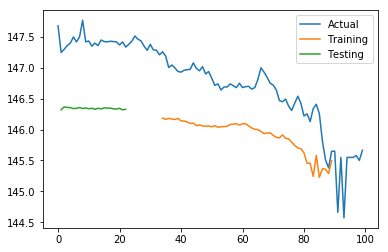

In [24]:
plt.plot(df['close'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()

In [25]:
##Forecasting

In [27]:
# For forecasting, Prophet requires a dataframe with two columns:
# 'ds' for the date/time
# 'y' for the value to forecast

df['ds'] = df.index
df['y'] = df['close']

forecast_data = df[['ds', 'y']].copy()
forecast_data.reset_index(inplace=True)
#del forecast_data['timestamp']
forecast_data.head()

,index,ds,y
0,99,99,145.665
1,98,98,145.500
2,97,97,145.580
3,96,96,145.550
4,95,95,145.550


In [28]:
# Create the Prophet model and fit the data
#from fbprophet import Prophet
#m = Prophet()
#m.fit(forecast_data);

#future = m.make_future_dataframe(periods=96, freq='H')
#future.tail()

#forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [29]:
# Plot the forecast
#import matplotlib as mpl
#fig = m.plot(forecast, xlabel='Date', ylabel='Price (USD)');
#plt.title('Bitcoin price forecast (USD)')
#fig.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))